In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import matplotlib

In [2]:
fp = '/Users/bejbcia/pythonprojects/Wojewodztwa/Wojewodztwa.shp'

In [3]:
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,WOJ,24,ÅlÄ skie,None,0,2017-10-10,None,2012-09-26,None,None,...,24,None,None,UZG,0,1331323,None,12.136952,1.557335,(POLYGON ((18.91685459000007 51.09608365100007...
1,WOJ,16,opolskie,None,0,2017-10-10,None,2012-09-26,None,None,...,16,None,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((17.81203097900004 51.18668781800005,..."
2,WOJ,30,wielkopolskie,None,0,2016-05-05,None,2012-09-26,None,None,...,30,None,None,UZG,0,1311516,None,18.408173,3.932196,"POLYGON ((16.71446700900003 53.29913246100006,..."
3,WOJ,32,zachodniopomorskie,None,0,2019-01-17,None,2012-09-26,None,None,...,32,None,None,UZG,0,1351683,None,12.146499,3.106476,"POLYGON ((14.22607683600006 53.92774300100007,..."
4,WOJ,26,ÅwiÄtokrzyskie,None,0,2012-09-26,None,2012-09-26,None,None,...,26,None,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((19.70430351800007 50.75239439200004,..."


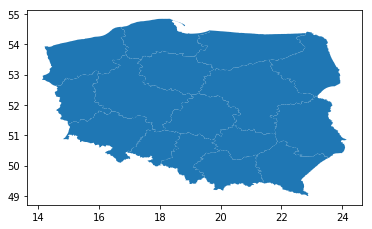

In [4]:
map_df.plot()

In [9]:
a = [[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
df_woj = np.array(a).reshape(16,2)

In [10]:
df_woj = pd.DataFrame(df_woj, columns=['z','j'])
df_woj

,z,j
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12
6,13,14
7,15,16
8,1,2
9,3,4


In [11]:
merged = map_df.set_index('JPT_SJR_KO').join(df_woj.set_index('z'))
merged['j'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
merged['k'] = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]).astype('int')
#merged["center"] = merged["geometry"].centroid
#merged.set_geometry("center", inplace = True)
merged.head()

,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,...,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry,j,k
WOJ,24,ÅlÄ skie,None,0,2017-10-10,None,2012-09-26,None,None,None,...,None,UZG,0,1331323,None,12.136952,1.557335,(POLYGON ((18.91685459000007 51.09608365100007...,1,1
WOJ,16,opolskie,None,0,2017-10-10,None,2012-09-26,None,None,None,...,None,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((17.81203097900004 51.18668781800005,...",2,2
WOJ,30,wielkopolskie,None,0,2016-05-05,None,2012-09-26,None,None,None,...,None,UZG,0,1311516,None,18.408173,3.932196,"POLYGON ((16.71446700900003 53.29913246100006,...",3,3
WOJ,32,zachodniopomorskie,None,0,2019-01-17,None,2012-09-26,None,None,None,...,None,UZG,0,1351683,None,12.146499,3.106476,"POLYGON ((14.22607683600006 53.92774300100007,...",4,4
WOJ,26,ÅwiÄtokrzyskie,None,0,2012-09-26,None,2012-09-26,None,None,None,...,None,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((19.70430351800007 50.75239439200004,...",5,5


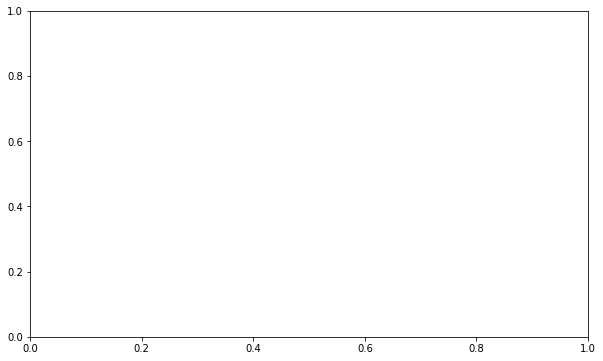

In [12]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'j'
# set the range for the choropleth
vmin, vmax = 1,16
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

In [13]:
merged.plot(column='j', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


<Figure size 432x288 with 0 Axes>

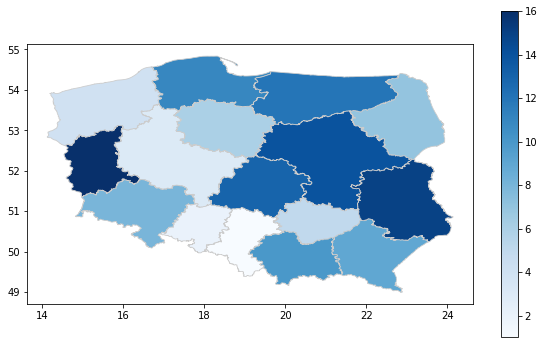

In [14]:
fig

In [170]:
from shapely.geometry import Point
#import adjustText as aT

ModuleNotFoundError: No module named 'adjustText'

In [185]:
merged["center"] = merged["geometry"].centroid
merged_c = merged.copy()
merged.set_geometry("center", inplace = True)

In [181]:
merged_c.head()

,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,...,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry,j,k,center
WOJ,24,ÅlÄ skie,None,0,2017-10-10,None,2012-09-26,None,None,None,...,UZG,0,1331323,None,12.136952,1.557335,(POLYGON ((18.91685459000007 51.09608365100007...,1,1,POINT (18.99409792737194 50.33107713876833)
WOJ,16,opolskie,None,0,2017-10-10,None,2012-09-26,None,None,None,...,UZG,0,1331326,None,9.005207,1.196205,"POLYGON ((17.81203097900004 51.18668781800005,...",2,2,POINT (17.89987336145672 50.6471110846816)
WOJ,30,wielkopolskie,None,0,2016-05-05,None,2012-09-26,None,None,None,...,UZG,0,1311516,None,18.408173,3.932196,"POLYGON ((16.71446700900003 53.29913246100006,...",3,3,POINT (17.24310243448235 52.33078261391233)
WOJ,32,zachodniopomorskie,None,0,2019-01-17,None,2012-09-26,None,None,None,...,UZG,0,1351683,None,12.146499,3.106476,"POLYGON ((14.22607683600006 53.92774300100007,...",4,4,POINT (15.54307042037075 53.58482334676548)
WOJ,26,ÅwiÄtokrzyskie,None,0,2012-09-26,None,2012-09-26,None,None,None,...,UZG,0,829374,None,9.264959,1.491827,"POLYGON ((19.70430351800007 50.75239439200004,...",5,5,POINT (20.76909435560666 50.76338769380988)


In [194]:
merged.plot(column='j', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
texts = []

for x, y, label in zip(merged.geometry.x, merged.geometry.y, merged["JPT_NAZWA_"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

In [176]:
map_df["rep"] = map_df["geometry"].representative_point()
map_points = map_df.copy()
map_points.set_geometry("rep", inplace = True)

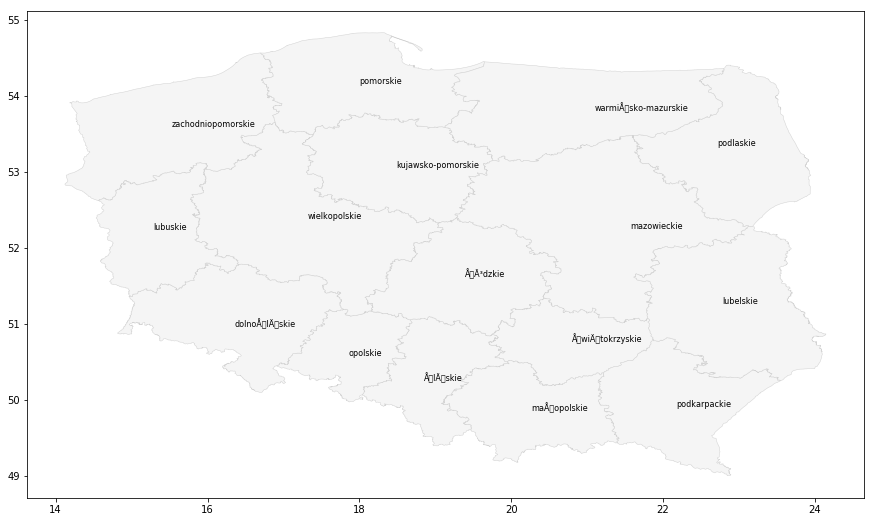

In [177]:
ax = map_df.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
texts = []

for x, y, label in zip(map_points.geometry.x, map_points.geometry.y, map_points["JPT_NAZWA_"]):
    texts.append(plt.text(x, y, label, fontsize = 8))

In [ ]:
male 0  female 100
flg 0 100
pk 20 n 0 in 10

In [ ]:
def top3(df):
    cols = df.columns
    top3 = {}
    while len(top3) < 3:
        for col in cols:
            if number of categories in dictionary is greater than in variable:
                porównać kategorie
                top3[col] = 'tekst że jest 0% tego poziomu'
            if 
                
    
    
    return top3